# **Лекция. Анализ табличных данных, визуализация графиков**

## Pandas

### Общая информация

Pandas - модуль для работы с табличными данными, взятыми как из базы данных (SQL), так и из выгрузок (файлы .csv, .xlsx).

Реализована на языке Python. Работа Pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня.

Ссылка на документацию
https://pandas.pydata.org/docs/index.html.

Ссылка на GitHub
https://pandas.pydata.org/docs/index.html.

Возможности библиотеки:
*   готовые методы для различных манипуляций с таблицами: добавления, удаления, преобразования, агрегирования данных;
*  одновременная обработка данных из разных файлов;
*  готовые методы для операций с пропущенными значениями, выявления и устранения проблемных данных;
*  использование данных в самых разных форматах.

Самая популярная библиотека для работы с данными, их анализа, проверки гипотез и т.д.

Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами.

### Структуры данных

**Series** представляет собой одномерную структуру, которую можно представить как таблицу с одним стобцом.


**DataFrame** – двумерная структура – полноценная таблица с множеством строк и столбцов.

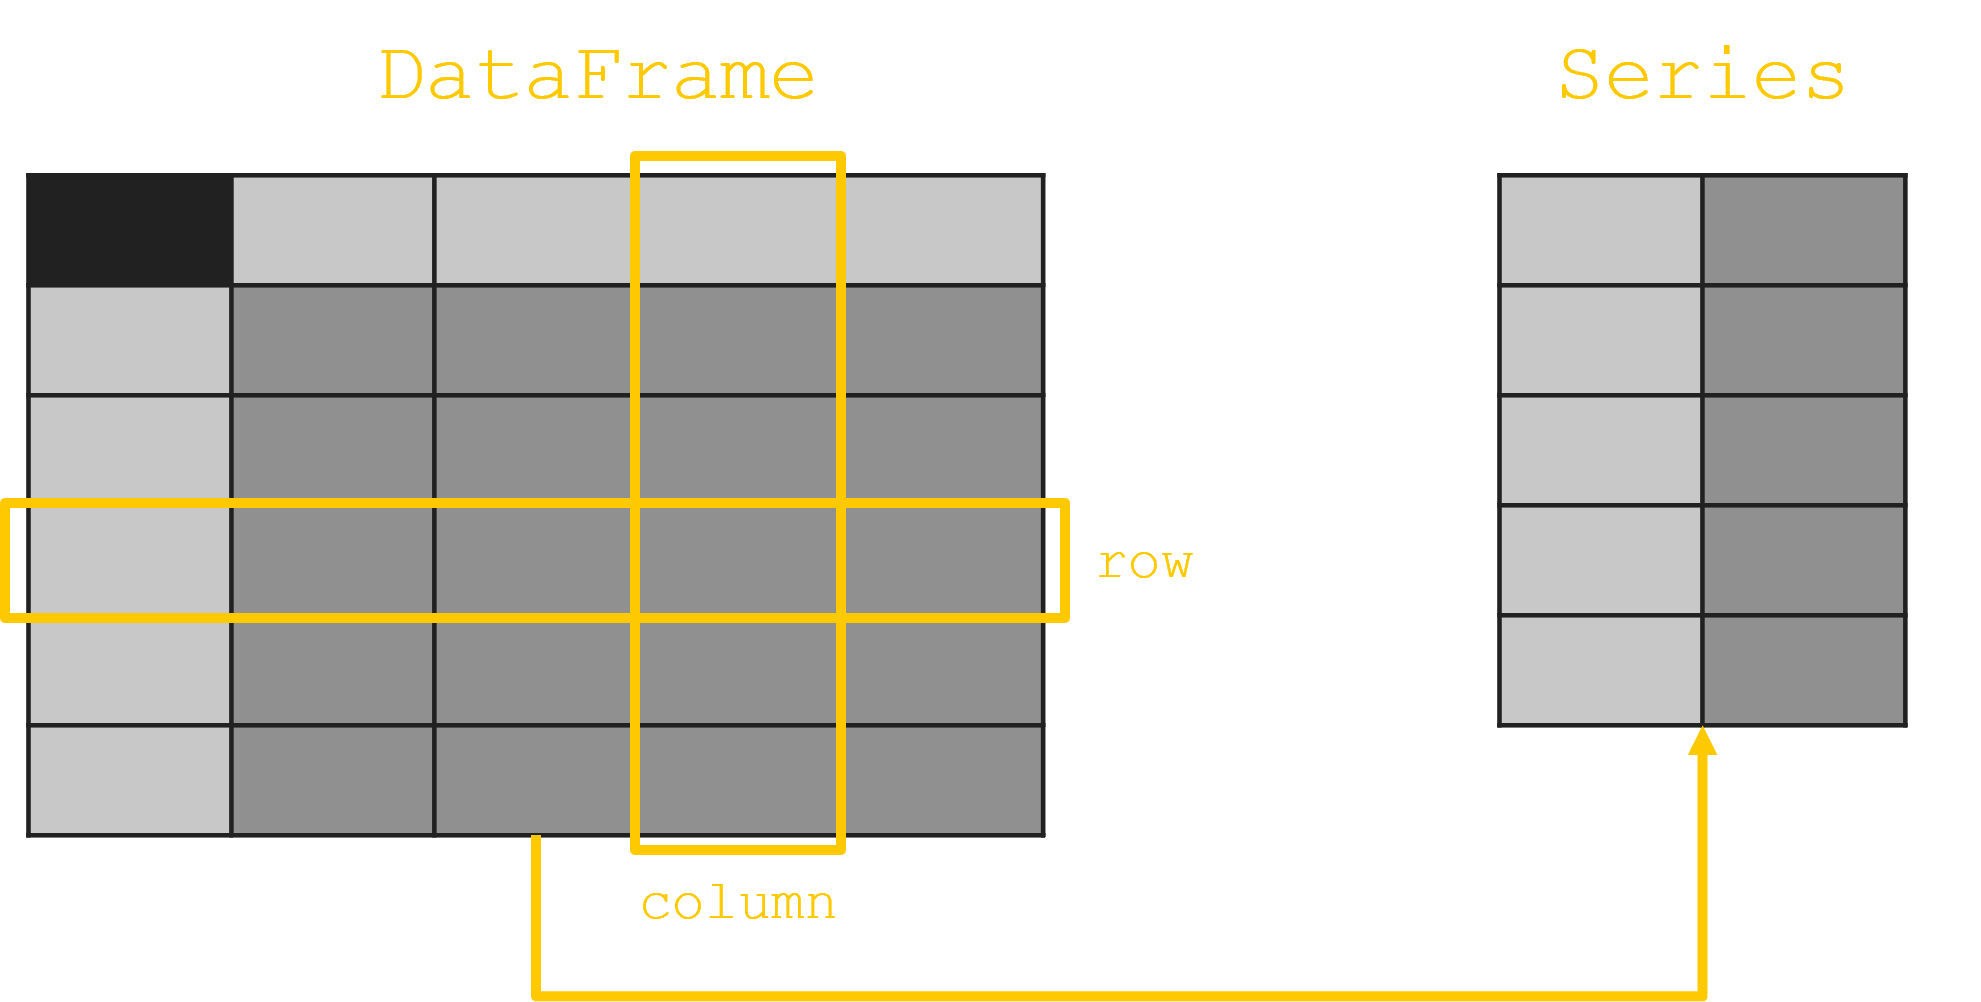

#### Pandas Series

In [1]:
# импорт библиотеки
import pandas as pd

pandas.Series: **Parameters**

`data: array-like, Iterable, dict, or scalar value`

Contains data stored in Series. If data is a dict, argument order is maintained.


---


`index: array-like or Index (1d)`

Values must be hashable and have the same length as data. Non-unique index values are allowed. Will default to RangeIndex (0, 1, 2, …, n) if not provided. If data is dict-like and index is None, then the keys in the data are used as the index. If the index is not None, the resulting Series is reindexed with the index values.


---



`dtype: str, numpy.dtype, or ExtensionDtype, optional`

Data type for the output Series. If not specified, this will be inferred from data. See the user guide for more usages.



---


`name: str, optional`

The name to give to the Series.


---



`copy: bool, default False`

Copy input data. Only affects Series or 1d ndarray input. See examples.

In [2]:
# создадим серию на основе списка
my_series = pd.Series([5, 6, 7, 8, 10])

print(my_series, '\n\n', type(my_series))

0     5
1     6
2     7
3     8
4    10
dtype: int64 

 <class 'pandas.core.series.Series'>




У серии индекс находится слева, а сам элемент - справа. Если индекс явно не 
задан, то pandas автоматически задает RangeIndex от 0 до N-1, где N - общее количество элементов. Также стоит обратить, что у Series есть тип хранимых элементов, в нашем случае это int64, т.к. мы передали целочисленные значения.





In [3]:
# посмотрим метки
print(my_series.index) # RangeIndex(start=0, stop=5, step=1)

RangeIndex(start=0, stop=5, step=1)


In [4]:
# посмотрим значения
print(my_series.values, '\n\n', type(my_series.values)) # это numpy.ndarray

[ 5  6  7  8 10] 

 <class 'numpy.ndarray'>


In [5]:
# метки можно задать явно (это не обязательно числа)
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])

print(my_series2)

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64


In [6]:
# обращение к элементам серии по метке
my_series2[[4]], type(my_series2[[4]]) 

(e    9
 dtype: int64, pandas.core.series.Series)

In [7]:
# обращение к элементам серии по метке
my_series2[['a']], type(my_series2[['a']]) 

(a    5
 dtype: int64, pandas.core.series.Series)

In [8]:
# обращение к элементам серии по индексу
my_series2[4], type(my_series2[4])

(9, numpy.int64)

In [9]:
# замена значений серии по метке (выборка по нескольким меткам и групповое присваивание)
my_series2[['a', 'b', 'c']] = 0
print(my_series2)

a     0
b     0
c     0
d     8
e     9
f    10
dtype: int64


In [10]:
# фильтрация серии
print(my_series2[my_series2 > 0])

d     8
e     9
f    10
dtype: int64


In [11]:
# создание серии с использованием словаря
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
print(my_series3)

a    5
b    6
c    7
d    8
dtype: int64


In [12]:
# проверка наличия метки
print(my_series3, '\n\n', 'd' in my_series3, '\n\n', 'z' in my_series3)

a    5
b    6
c    7
d    8
dtype: int64 

 True 

 False


In [13]:
# именование индексов и именование значений
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
print(my_series3)

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64


#### Pandas DataFrame

**DataFrame** – это двумерная маркированная структура. Столбцами в объекте **DataFrame** выступают объекты **Series** (серии), строки - являются непосредственно их элементами.


pandas.DataFrame: **Parameters**

`data: ndarray (structured or homogeneous), Iterable, dict, or DataFrame`


Dict can contain Series, arrays, constants, dataclass or list-like objects. If data is a dict, column order follows insertion-order. If a dict contains Series which have an index defined, it is aligned by its index.


---



`index: Index or array-like`

Index to use for resulting frame. Will default to RangeIndex if no indexing information part of input data and no index provided.


---



`columns: Index or array-like`



Column labels to use for resulting frame when data does not have them, defaulting to RangeIndex(0, 1, 2, …, n). If data contains column labels, will perform column selection instead.


---



`dtype: dtype, default None`

Data type to force. Only a single dtype is allowed. If None, infer.



---


`copy: bool or None, default None`

Copy data from inputs. For dict data, the default of None behaves like copy=True. For DataFrame or 2d ndarray input, the default of None behaves like copy=False. If data is a dict containing one or more Series (possibly of different dtypes), copy=False will ensure that these inputs are not copied.

In [15]:
 # пример создания DataFrame
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Italy'],
    'population': [19.0, 143.4, 9.34, 61.01],
    'square  ': [2725000, 17100000, 207595, 301230]
})

df

,country,population,square
0,Kazakhstan,19.00,2725000
1,Russia,143.40,17100000
2,Belarus,9.34,207595
3,Italy,61.01,301230


In [16]:
df.tail() # метод возвращает последние 3 строки в датафреме

,country,population,square
1,Russia,143.40,17100000
2,Belarus,9.34,207595
3,Italy,61.01,301230


In [17]:
df.head() # метод возвращает первые 3 строки в датафрейме

,country,population,square
0,Kazakhstan,19.00,2725000
1,Russia,143.40,17100000
2,Belarus,9.34,207595


In [18]:
# посмотрим типы данных в столбцах

print(df.dtypes) # object - это чаще всего строки

country        object
population    float64
square          int64
dtype: object


In [19]:
# посмотрим данные столбца
df.population # догадайтесь, какого типа данных является столбец DataFrame?

0     19.00
1    143.40
2      9.34
3     61.01
Name: population, dtype: float64

In [20]:
type(df.population)

pandas.core.series.Series

In [21]:
# зададим имена меткам
df.index = ['KZ', 'RU', 'BY', 'IT']
df

,country,population,square
KZ,Kazakhstan,19.00,2725000
RU,Russia,143.40,17100000
BY,Belarus,9.34,207595
IT,Italy,61.01,301230


**Доступ к данным DataFrame**


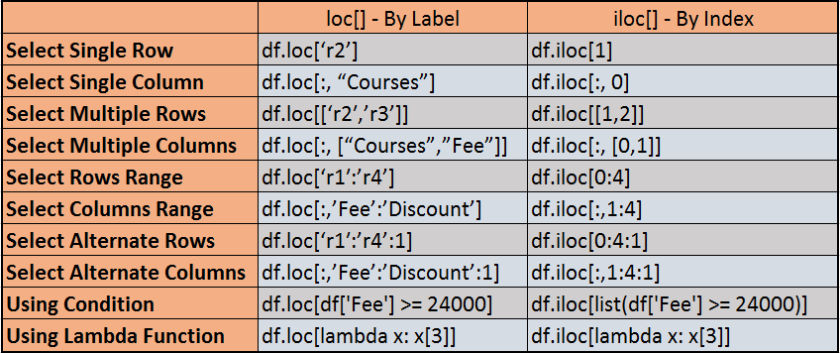

метод **`loc`** используется для доступа к данным DataFrame по строковой метке

In [22]:
df.loc['KZ']  # доступ по именованной метке к строке KZ

country       Kazakhstan
population          19.0
square           2725000
Name: KZ, dtype: object

с помощью метода **`loc`** можно обратиться к строкам по метке не целиком, а к конкретным столбцам

In [23]:
df.loc[['KZ', 'RU'], 'population'] # указали метки, затем столбцы

KZ     19.0
RU    143.4
Name: population, dtype: float64

метод **`iloc`** используется для доступа по индексу (начиная от 0), i-индекс

In [24]:
df.iloc[0] # то же, но уже по номеру строки (нулевая строка)

country       Kazakhstan
population          19.0
square           2725000
Name: KZ, dtype: object

In [25]:
# обращение не только к строкам, но и конкретной колонке по индексам:
df.iloc[[0, 1], [1]] # не строковые метки, а индексы

,population
KZ,19.0
RU,143.4


**Фильтрация**

In [26]:
# фильтрация
# выведем все строки, для которых значения столбца population больше 10 

df[df.population > 10] # df.population > 10 - это серия из значений True и False, Далее мы передаем булевые значения в Pandas DataFrame и выводятся те строки, где True

,country,population,square
KZ,Kazakhstan,19.00,2725000
RU,Russia,143.40,17100000
IT,Italy,61.01,301230


In [27]:
df[df.population > 10][['country', 'square  ']] # обращение к списку столбцов 'country', 'square  ', плюс добавлено некоторое условие

,country,square
KZ,Kazakhstan,2725000
RU,Russia,17100000
IT,Italy,301230


In [28]:
# или сначала создадим маску
mask = (df.country == 'Russia')

print(df[mask])

   country  population  square  
RU  Russia       143.4  17100000


**Добавление нового столбца**

In [29]:
# добавим новый столбец в таблицу
df['density'] = df['population'] / df['square  '] * 1000000 # расчёт плотности
print(df)

       country  population  square       density
KZ  Kazakhstan       19.00   2725000    6.972477
RU      Russia      143.40  17100000    8.385965
BY     Belarus        9.34    207595   44.991450
IT       Italy       61.01    301230  202.536268


**Удаление столбца**

In [30]:
# удаление столбца
df_copy = df.drop(['density'], axis=1)

In [31]:
print(df_copy)

       country  population  square  
KZ  Kazakhstan       19.00   2725000
RU      Russia      143.40  17100000
BY     Belarus        9.34    207595
IT       Italy       61.01    301230


In [32]:
print(df)

       country  population  square       density
KZ  Kazakhstan       19.00   2725000    6.972477
RU      Russia      143.40  17100000    8.385965
BY     Belarus        9.34    207595   44.991450
IT       Italy       61.01    301230  202.536268


In [33]:
df.drop(['density'], axis=1, inplace=True) # Если inplace=True, то выполняем преобразование структуры "на месте", в противном случае просто создаем копию!
print(df) 

       country  population  square  
KZ  Kazakhstan       19.00   2725000
RU      Russia      143.40  17100000
BY     Belarus        9.34    207595
IT       Italy       61.01    301230


**При удалении не нужно забывать указывать ось, если не указать, то пандас по умолчанию будет искать названия в строках (ассоциативную метку).**

**Переименование столбца**

Для того, чтобы с таблицей было удобно работать, рекомендуется, чтобы для названий столбцов выполнялись следующие правила:

• без пробелов в начале, середине и конце

• несколько слов разделяются нижним подчеркиванием

• все названия должны быть написаны на одном языке и должны быть в одном регистре

• названия столбцов должны отражать в краткой форме, какого рода информация содержится в них


In [34]:
# переименуем столбец
df = df.rename(columns={'square  ': 'square'})
df

,country,population,square
KZ,Kazakhstan,19.00,2725000
RU,Russia,143.40,17100000
BY,Belarus,9.34,207595
IT,Italy,61.01,301230


**Вывод записей с наибольшими/наименьшими значениями столбца**

In [35]:
# выведем 3 страны с наибольшим населением
df.nlargest(3, 'population')

,country,population,square
RU,Russia,143.40,17100000
IT,Italy,61.01,301230
KZ,Kazakhstan,19.00,2725000


In [36]:
# выведем 3 страны с наименьшим населением
df.nsmallest(3, 'population')

,country,population,square
BY,Belarus,9.34,207595
KZ,Kazakhstan,19.00,2725000
IT,Italy,61.01,301230


**Немного примеров анализа импортированных данных**

Исследование данных обычно содержит четыре основные стадии

*   получение и ознакомление;
*   подготовка;
*   анализ данных;
*   оформление результатов исследования.

Импорт данных

* pd.read.csv('filename')
* pd.read.excel('filename')
* pd.read.sql(query, 'connection_object')
* pd.read.table('filename')
* pd.read.json('filename')
* pd.read.html('filename')
* pd.read.clipboard('filename')
* pd.DataFrame(dict)

In [37]:
# загрузим данные о численности населения в мире (взяты с kaggle)

url = 'https://raw.githubusercontent.com/varlamova95/AP4/main/population_by_country_2020.csv'

df = pd.read_csv(url, sep = ',')

In [ ]:
# загрузить с диска
# from google.colab import files
# uploaded = files.upload()

Файл может быть очень большим - не помещающимся целиком в оперативную память (например, файл 16Гб, а ОП - 4Гб). (например, логи пользователя гигабайтами), тогда файл нужно читать чанками в каждой итерации будет выдаваться чанк заданного размера. (например, обрабатываем кусок данных, что-то по ним высчитываем (допустим, среднее значение), записываем в какую-то отдельную таблицу и переходим ко следующему чанку)

In [38]:
# ознакомимся со структурой таблицы
df.head(9)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212253150,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,205052107,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164354176,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145922010,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %


In [39]:
df.tail(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
225,Wallis & Futuna,11276,-1.69 %,-193,80,140,NaN,N.A.,N.A.,0 %,0.00 %
226,Nauru,10810,0.63 %,68,541,20,NaN,N.A.,N.A.,N.A.,0.00 %
227,Saint Barthelemy,9871,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
228,Saint Helena,6073,0.30 %,18,16,390,NaN,N.A.,N.A.,27 %,0.00 %
229,Saint Pierre & Miquelon,5800,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %
230,Montserrat,4991,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %


In [40]:
# посмотрим какие есть столбцы в таблице
print(df.columns)

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')


In [41]:
print(df.dtypes)

Country (or dependency)     object
Population (2020)            int64
Yearly Change               object
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                  object
Med. Age                    object
Urban Pop %                 object
World Share                 object
dtype: object


In [42]:
# информация по столбцам таблицы
print(df.info()) # можно видеть, что в таблице 235 записей, а в столбце 'Migrants (net)' число ненулевых элементов меньше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB
None


In [43]:
# статистика по фрейму
df.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.309773e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.349417e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.981150e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.459116e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.045283e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.438207e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


**Обработка отсутствующих значений**

Отсуствующие элементы

Замены пропущенных значений в DataFrame бывают трёх видов:

1) None или NaN. None — это эквивалент null в других языках программирования: особое значение, указывающее, что в этой ячейке таблицы никакого значения нет. None относится к NoneType. NaN говорит о том, что в ячейке находится «не число». Основное отличие NaN в том, что его можно использовать в математических операциях, так как по типу это число с плавающей запятой.

2) Плейсхолдеры (тексты-заполнители) какого-нибудь общепринятого стандарта. Чаще всего это n/a, na, NA, и N.N. либо NN.

3) Неожиданные: например, пустые значения в таблице могут заполняться знаками вопроса или нулями. Если какой-нибудь спецсимвол или число встречаются часто, и этому нет внятного объяснения, то высока вероятность, что так передаются пропущенные значения.

! Нули могут быть и действительно нулями.

Обработка NaN

В зависимости от задачи используется тот или иной метод заполнения отсутствующих элементов, это может быть нулевое значение, математическое ожидание, медиана и т.п.

Больше информации
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html 

In [44]:
pd.isnull(df) # False, если значение поля есть, или True, если значение в данном поле – это NaN.  (написать np.nan == np.nan нельзя, т.к. будет False, он не равен даже самому себе)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
230,False,False,False,False,False,False,True,False,False,False,False
231,False,False,False,False,False,False,True,False,False,False,False
232,False,False,False,False,False,False,True,False,False,False,False
233,False,False,False,False,False,False,True,False,False,False,False


In [45]:
df.isnull().sum() # подсчет числа пустых элементов

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

In [46]:
# замена отсутствующих данных на числовые значения 
df.fillna(0)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,0.0,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,0.0,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,0.0,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,0.0,N.A.,N.A.,0 %,0.00 %


In [48]:
# NaN можно заменить на разные значения в зависимости от колонки, указывая их и соответствующие значения
df.fillna({'Migrants (net)': 10}, inplace=True)
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,10.0,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,10.0,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,10.0,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,10.0,N.A.,N.A.,0 %,0.00 %


In [49]:
# данные можно заполнить средним значением по столбцу
df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,10.0,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,10.0,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,10.0,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,10.0,N.A.,N.A.,0 %,0.00 %


Удаление строк или столбцов

Довольно часто используемый подход при работе с отсутствующими данными – это удаление записей (строк) или полей (столбцов), в которых встречаются пропуски. 

In [50]:
# удаление всех объектов, которые содержат значения NaN - dropna() без аргументов
df.dropna() # удаление записей (строк)
df.dropna(axis=1) # удаление записей (столбцов)
df.dropna(axis=1, thresh=3) # удаление всех столбцов, в которых количество не NaN меньше трех

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,10.0,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,10.0,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,10.0,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,10.0,N.A.,N.A.,0 %,0.00 %


In [51]:
# cделаем замену
import numpy as np

df[df['Med. Age'] == 'N.A.'] = np.nan

np.nan -это float -> если в целочисленном столбце присвоить какое-нибудь значение NaN, то весь столбец будет преобразован в NaN 

In [52]:
# фильтрация
df[df['Population (2020)'] > 143820888][['Density (P/Km²)', 'Land Area (Km²)']]

,Density (P/Km²),Land Area (Km²)
0,153.0,9388211.0
1,464.0,2973190.0
2,36.0,9147420.0
3,151.0,1811570.0
4,287.0,770880.0
5,25.0,8358140.0
6,226.0,910770.0
7,1265.0,130170.0
8,9.0,16376870.0


In [53]:
# сортировка

df.sort_values(by=['Land Area (Km²)'], ascending=[False], inplace=True) # тут та же память (inplace), ascending - сортировать по возрастанию

In [54]:
# установим значение площади России 100
df.loc[[8], 'Land Area (Km²)'] = 100

# альтернативы
# df.iloc[[8], [5]] = 100
# df.set_value(8, 'Land Area (Km²)', 100) 

Применение функции к каждому столбцу

In [55]:
# среднее значение в столбце
df['Population (2020)'].mean()

38690720.84079602

In [56]:
# максимальное значение в столбце
df['Population (2020)'].max()

1438207241.0

**Группировка данных**

In [57]:
df.groupby('Med. Age').count() 

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Urban Pop %,World Share
Med. Age,,,,,,,,,,
15,1,1,1,1,1,1,1,1,1,1
16,1,1,1,1,1,1,1,1,1,1
17,6,6,6,6,6,6,6,6,6,6
18,10,10,10,10,10,10,10,10,10,10
19,14,14,14,14,14,14,14,14,14,14
20,9,9,9,9,9,9,9,9,9,9
21,5,5,5,5,5,5,5,5,5,5
22,7,7,7,7,7,7,7,7,7,7
23,4,4,4,4,4,4,4,4,4,4


**Экспорт данных**

df.to_csv(‘filename’)

df.to_excel(‘filename’)

df.to_sql(table_name, connection_object’)

df.to_html(‘filename’)

df.to_json(‘filename’)

df.to_clipboard()

In [58]:
df.to_csv('population.csv')

## Matplotlib

Библиотека для визуализации данных

https://matplotlib.org/

Визуализация данных помогает представить большие и сложные наборы данных в простом и наглядном виде.
Содержит инструменты для визуализации различных графиков, диаграмм, гистограмм, спектрограмм:
1. Линейные диаграммы;
2. Точечные диаграммы;
3. Диаграммы с областями;
4. Столбцовые диаграммы и гистограммы;
5. Круговые диаграммы;
6. Диаграммы «стебель-листья»;
7. Контурные графики;
8. Поля векторов;
9. Спектрограммы.

Иерархия объектов

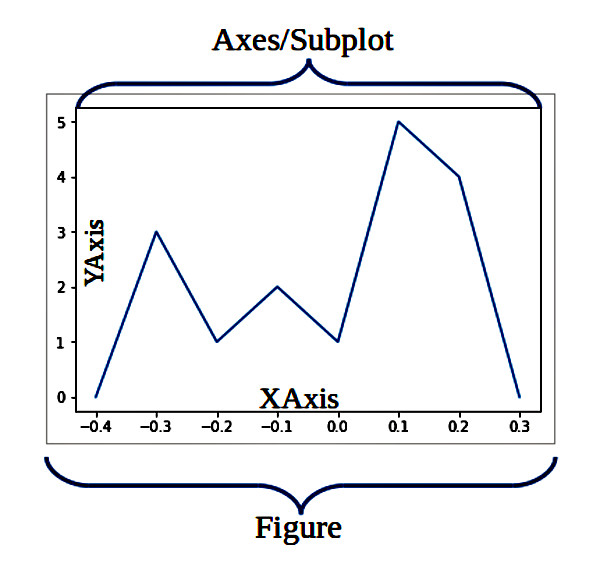

In [60]:
import matplotlib.pyplot as plt

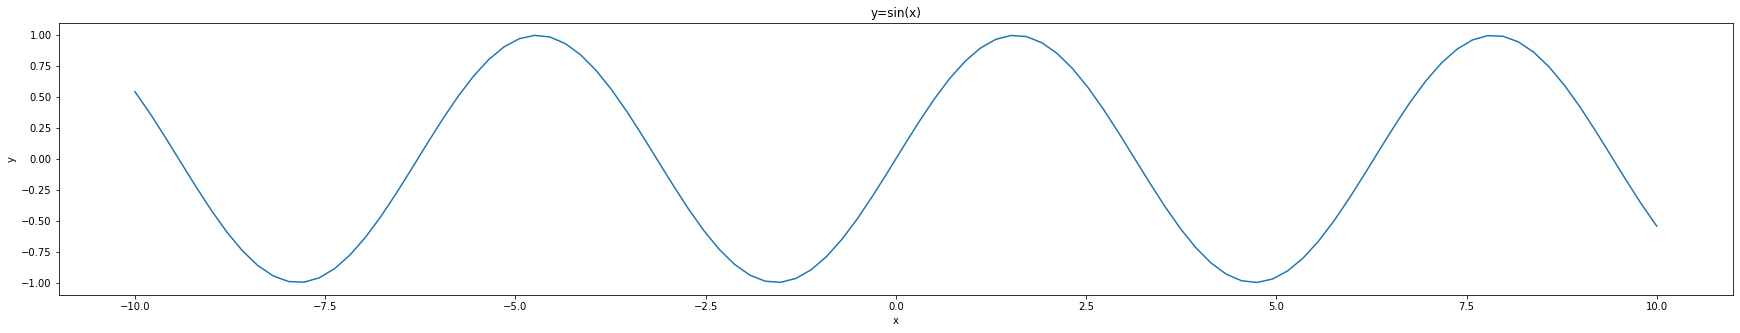

In [63]:
# различные способы визуализации данных:
x =  np.linspace(-10, 10, 100)
y1 = np.sin(x)

#линейный график
fig = plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('y=sin(x)')
plt.plot(x, y1, color='green', linestyle='--', marker='x', linewidth=1, markersize=4) 
plt.show()

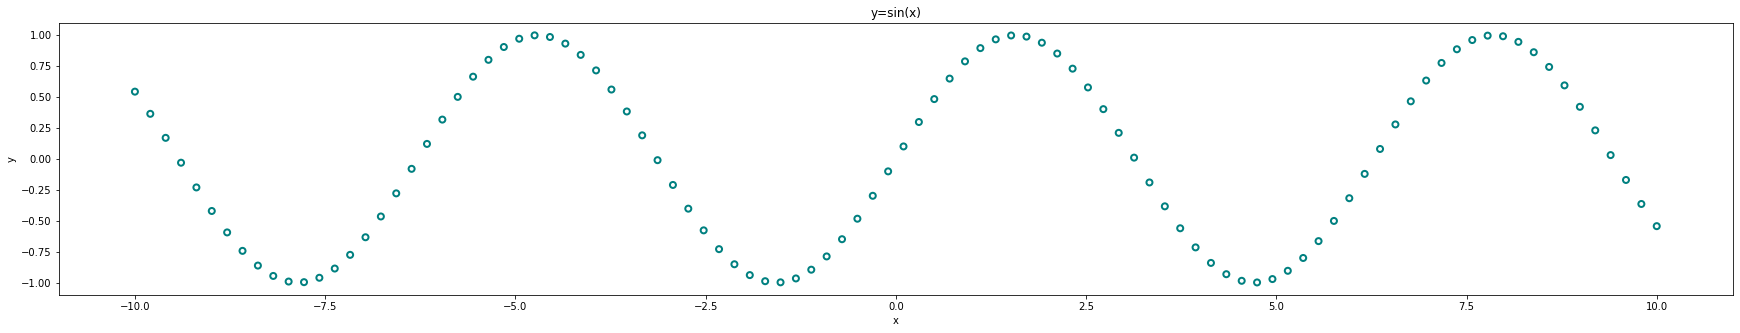

In [65]:
# точечная диаграмма
fig = plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('y=sin(x)')
plt.scatter(x, y1, color='teal', marker='o', linewidths=2, facecolors='none') 
plt.show()

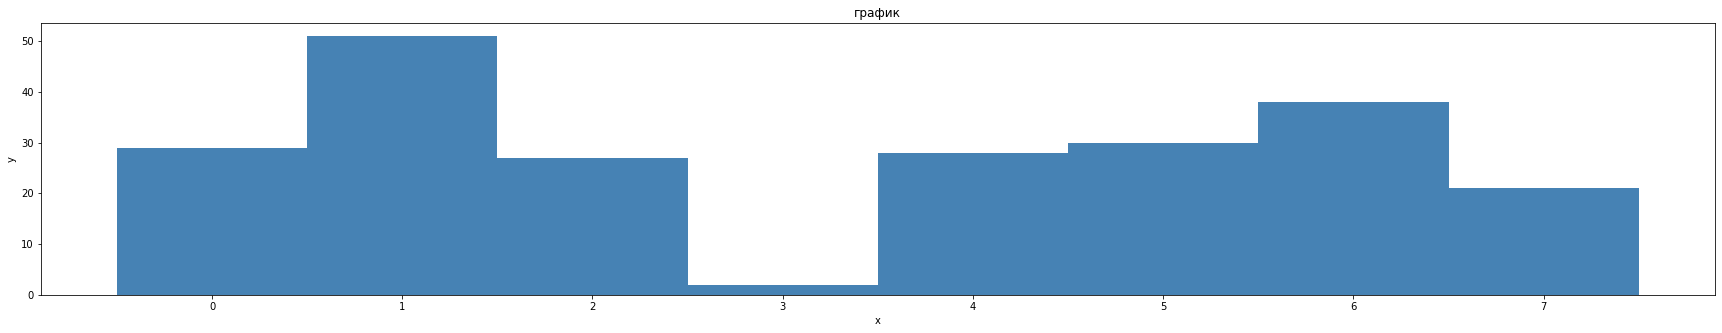

In [67]:
# столбчатая диаграмма
x = np.arange(8)
y = np.random.randint(0, 100, len(x))

fig = plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('график')
plt.bar(x, y, color='steelblue', width=1)
plt.show()

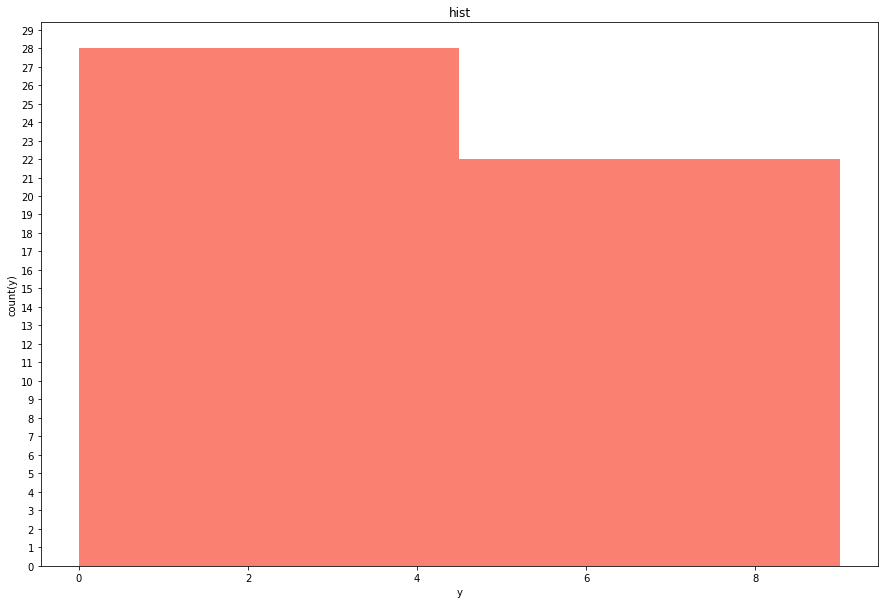

In [68]:
# гистограмма - подсчитывается при вызове по данным
x = np.random.randint(0, 10, 50)

fig = plt.figure(figsize=(15, 10))
plt.ylabel('count(y)')
plt.yticks(range(0,50))
plt.xlabel('y')
plt.title('hist')
plt.hist(x, bins=2, color='salmon') 
plt.show()

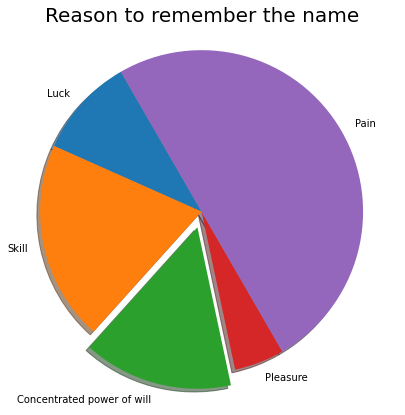

In [69]:
# круговая диаграмма
labels = 'Luck', 'Skill', 'Concentrated power of will', 'Pleasure', 'Pain' #заголовки, против часовой
sizes = [10, 20, 15, 5, 50] # значения
explode = (0, 0, 0.1, 0, 0)  # парметры выделения кусков диаграммы

fig1, ax1 = plt.subplots(figsize=(7, 7))
plt.title('Reason to remember the name', fontsize=20)
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=120)
ax1.axis('equal')  #чтобы получился круг
plt.show()

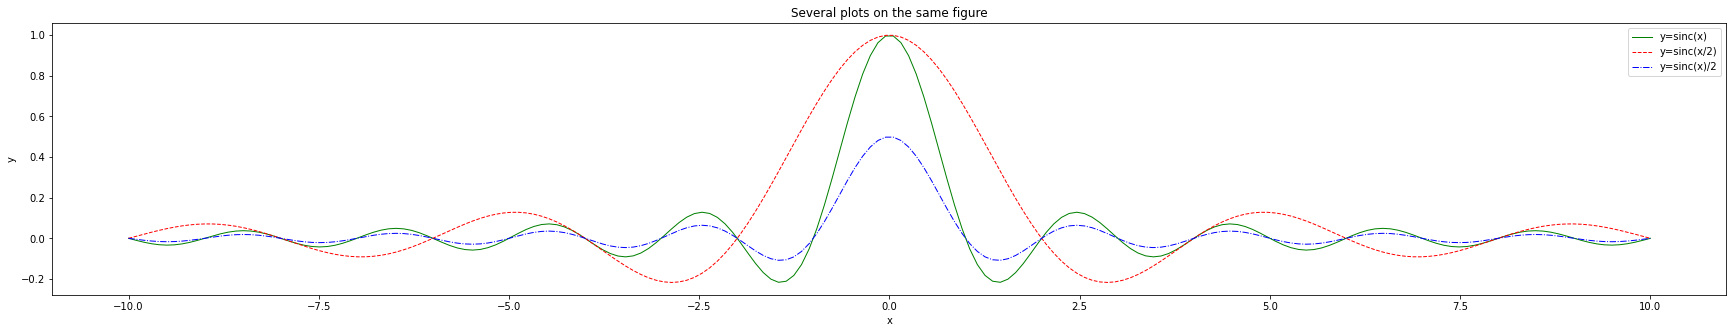

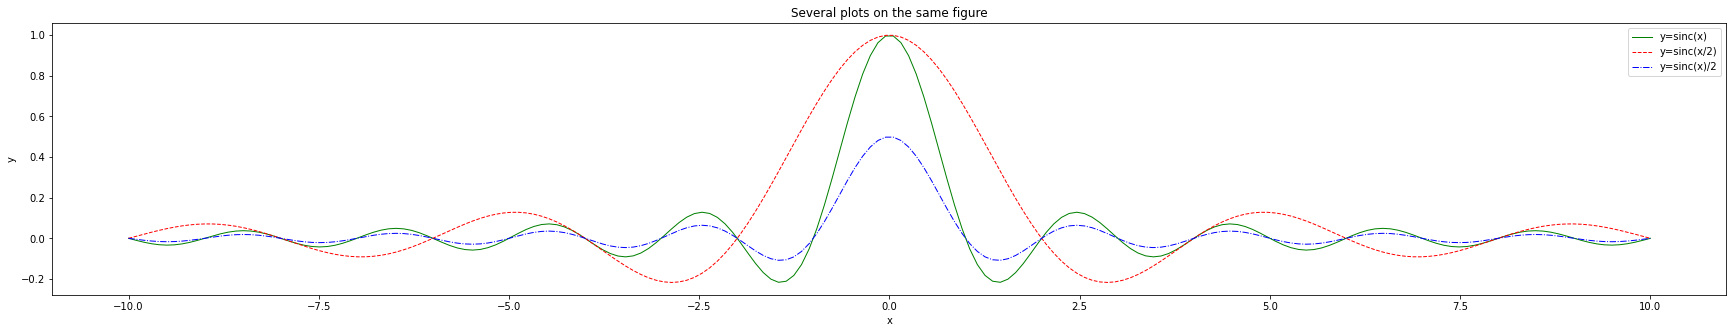

In [70]:
# несколько зависимостей на одном графике
x = np.linspace(-10, 10, 200)
y1 = np.sinc(x)
y2 = np.sinc(x / 2)
y3 = np.sinc(x) / 2

fig=plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('Several plots on the same figure')
plt.plot(x, y1, color='green', linestyle='-', linewidth=1, label='y=sinc(x)') 
plt.plot(x ,y2, color='red', linestyle='--', linewidth=1, label='y=sinc(x/2)')
plt.plot(x, y3, color='blue', linestyle='-.', linewidth=1, label='y=sinc(x)/2') 
plt.legend() 
plt.show()

# альтернативное задание названий зависимостей для легенды
fig=plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('Several plots on the same figure')
plt.plot(x,y1, color='green', linestyle='-', linewidth=1) 
plt.plot(x,y2, color='red', linestyle='--', linewidth=1)
plt.plot(x,y3, color='blue', linestyle='-.', linewidth=1) 
plt.legend(['y=sinc(x)','y=sinc(x/2)','y=sinc(x)/2']) 
plt.show()

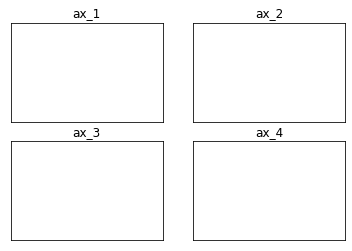

In [71]:
# несколько графиков в одном окне
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title='ax_1', xticks=[], yticks=[])
ax_2.set(title='ax_2', xticks=[], yticks=[])
ax_3.set(title='ax_3', xticks=[], yticks=[])
ax_4.set(title='ax_4', xticks=[], yticks=[])

plt.show()

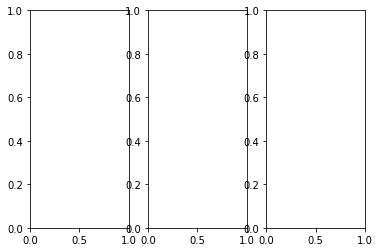

In [72]:
plt.subplot(1, 3, 1)
plt.subplot(1, 3, 2)
plt.subplot(1, 3, 3)
plt.show()

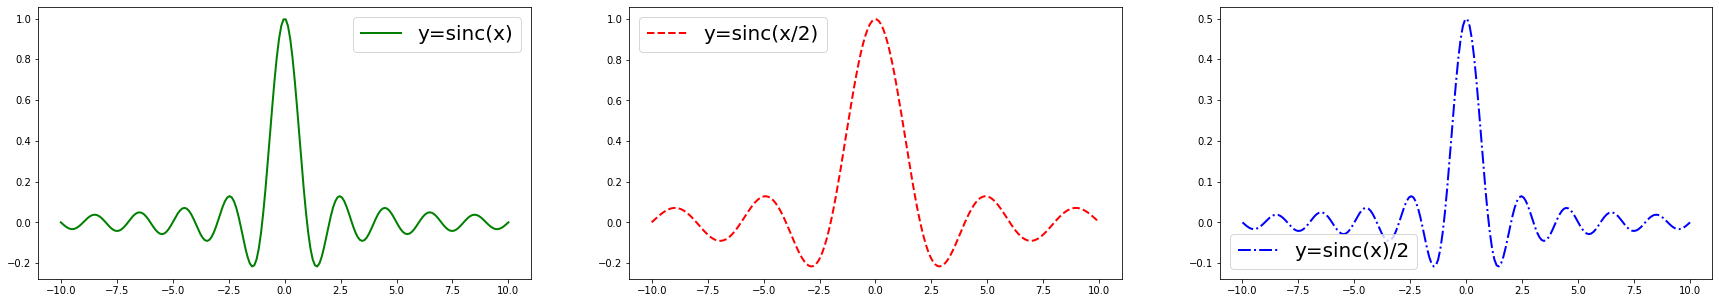

In [73]:
# несколько графиков в одном окне
fig = plt.figure(figsize=(30, 5))

fig.add_subplot(1, 3, 1)
plt.plot(x, y1, color='green', linestyle='-', linewidth=2, label='y=sinc(x)') 
plt.legend(loc=1, prop={'size': 20}) # верхний правый

fig.add_subplot(1, 3, 2)
plt.plot(x, y2, color='red', linestyle='--', linewidth=2, label='y=sinc(x/2)')
plt.legend(loc=2, prop={'size': 20}) # верхний левый 

fig.add_subplot(1, 3, 3)
plt.plot(x, y3, color='blue', linestyle='-.', linewidth=2, label='y=sinc(x)/2')
plt.legend(loc=3, prop={'size': 20}) # внизу слева

plt.show()

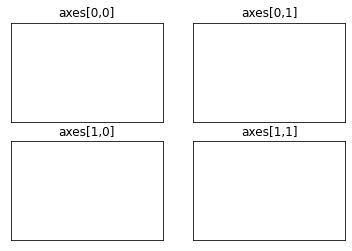

In [74]:
# несколько графиков в одном окне - альтернативный вариант
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.show()

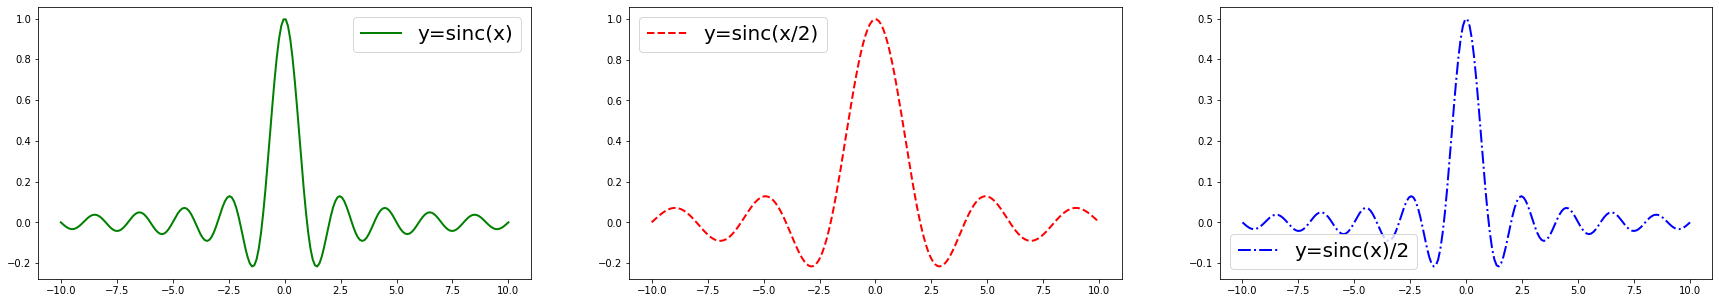

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

axes[0].plot(x, y1, color='green', linestyle='-', linewidth=2, label='y=sinc(x)') 
axes[0].legend(loc=1, prop={'size': 20}) 

axes[1].plot(x, y2, color='red', linestyle='--', linewidth=2, label='y=sinc(x/2)')
axes[1].legend(loc=2, prop={'size': 20}) 

axes[2].plot(x, y3, color='blue', linestyle='-.', linewidth=2, label='y=sinc(x)/2')
axes[2].legend(loc=3, prop={'size': 20})

plt.show()

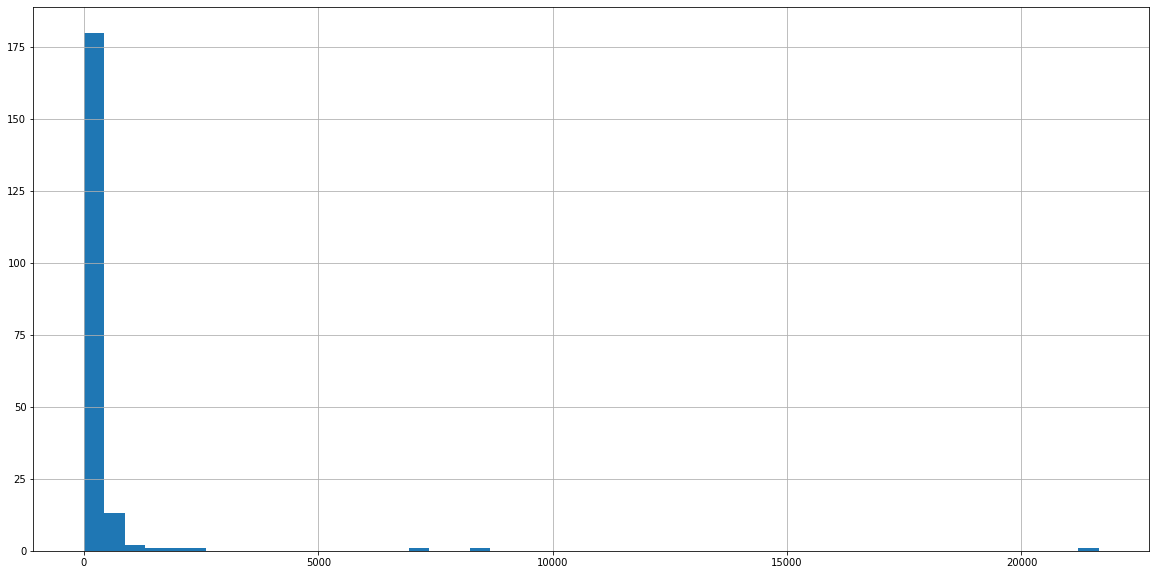

<Figure size 432x288 with 0 Axes>

In [76]:
# посмотрим гистограмму распределения значений для какого-либо столбца таблицы
fig=plt.figure(figsize=(20, 10))

hist = df['Density (P/Km²)'].hist(bins=50) # либо в аргументах можно указать имя столбца
plt.show()

plt.savefig('saved_figure.png')